In [65]:
import pandas as pd

df = pd.read_csv("creditcard.csv")



In [66]:
x=df.drop(['Class'],axis=1)
y=df['Class']

In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=97)

In [69]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [70]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(clf,x_train,y_train,cv=3)


**Using Confusion Matrix**

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[198986,     30],
       [   132,    216]])

In [72]:
from sklearn.metrics import precision_score, recall_score,f1_score
precision_score(y_train,y_train_pred)

0.8780487804878049

In [73]:
recall_score(y_train,y_train_pred)

0.6206896551724138

In [74]:
f1_score(y_train,y_train_pred)

0.7272727272727273

In [75]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


###   from the above scores we see that precision and recall are not good this's because the data is extremely skewed

# Plotting ROC curve

In [76]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf,x_train,y_train,cv=3,
                             method='decision_function')

In [77]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train,y_scores)

<function matplotlib.pyplot.show(close=None, block=None)>

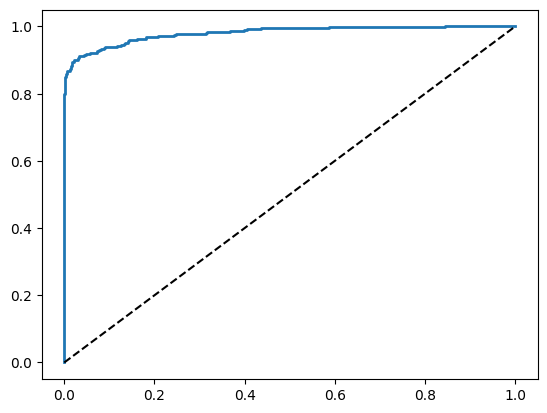

In [78]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr,tpr)
plt.show

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

np.float64(0.9801543132441497)

In [80]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_train,y_scores)

#  Plotting Precision Vs. Recall

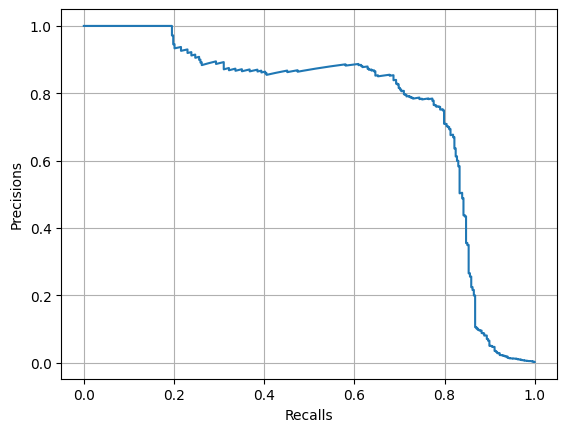

In [81]:
plt.clf()
plt.plot(recalls,precisions)
plt.grid(True)
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.show()

# Dealing with Imabalnce, first Using Weighted data

In [82]:
clf = LogisticRegression(class_weight='balanced')


In [83]:
y_train_pred=cross_val_predict(clf,x_train,y_train,cv=3)

In [84]:
confusion_matrix(y_train_pred,y_train)

array([[193967,     34],
       [  5049,    314]])

In [85]:
precision_score(y_train,y_train_pred)

0.05854931941077755

In [86]:
recall_score(y_train,y_train_pred)

0.9022988505747126

In [87]:
f1_score(y_train,y_train_pred)

0.10996322885659254

#### this shows very low f1 score, we would see other method

# Dealing with Imbalance Using SMOTE

In [88]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_train, y_train)

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res
                                                    , test_size=0.3,random_state=97)

In [90]:
clf=LogisticRegression()
y_train_pred=cross_val_predict(clf,x_train,y_train,cv=3)

In [91]:
confusion_matrix(y_train_pred,y_train)

array([[135872,  10516],
       [  3585, 128649]])

In [92]:
precision_score(y_train,y_train_pred)

0.9728889695539725

In [93]:
recall_score(y_train,y_train_pred)

0.9244350231739302

### in our dataset the recall is more importnat and using SMOTE we got to both high precision and  high recall

In [94]:
f1_score(y_train,y_train_pred)

0.9480432868212484

<function matplotlib.pyplot.show(close=None, block=None)>

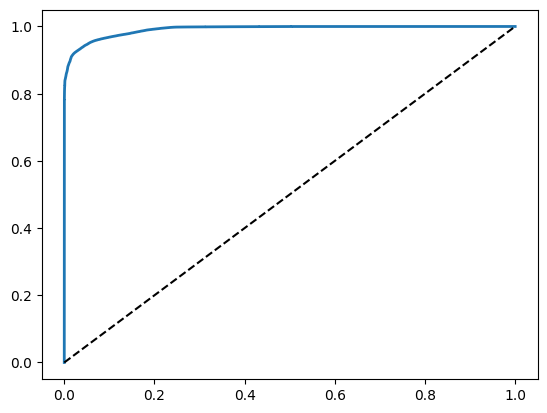

In [95]:
y_scores = cross_val_predict(clf,x_train,y_train,cv=3,
                             method='decision_function')
fpr,tpr,thresholds=roc_curve(y_train,y_scores)
plt.clf()
plot_roc_curve(fpr,tpr)
plt.show

### here we see much better ROC curve

In [96]:
roc_auc_score(y_train,y_scores)

np.float64(0.9911708315825516)

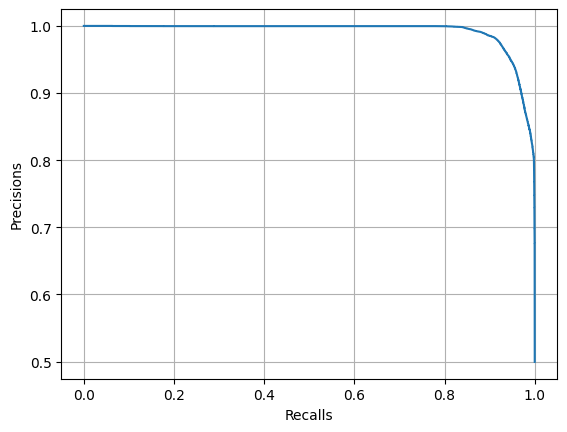

In [97]:
precisions, recalls, thresholds=precision_recall_curve(y_train,y_scores)
plt.clf()
plt.plot(recalls,precisions)
plt.grid(True)
plt.xlabel('Recalls')
plt.ylabel('Precisions')
plt.show()

### Now, we have much better ROC curve, ROC AUC score, and much better PR curve